#  Cp/Cpk-Analyse für `convex_volume`
In diesem Notebook analysieren wir die Prozessfähigkeit des AOI-Systems basierend auf dem Merkmal `convex_volume`, das im Modelltraining die höchste Feature Importance hatte. Ziel ist es, zu prüfen, ob der Prozess auch statistisch stabil ist, nicht nur modellseitig performant.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# CSV-Datei laden
df = pd.read_csv("01_generated_aoi_data_80_20_ratio_rounded.csv")
df.head(10)

,convex_volume,max_height,area,roundness,pad_distance,label
0,1.9264,1.4259,3.8846,0.8988,0.2280,OK
1,2.6191,1.5801,4.2819,0.9030,0.1525,OK
2,2.9427,1.2019,3.3805,0.8941,0.2546,OK
3,2.6678,1.7501,4.1928,0.8484,0.1524,OK
4,4.0634,2.0017,6.3782,0.5019,0.0802,NOK
5,2.3926,1.2957,3.7398,0.8317,0.1974,OK
6,2.2502,1.4045,3.6152,0.9566,0.2624,OK
7,2.6682,1.4022,3.5797,0.8346,0.1802,OK
8,3.0173,1.1952,3.8982,0.8690,0.2108,OK
9,2.4635,1.3904,3.4636,0.8393,0.1685,OK


In [8]:
# Cp und Cpk berechnen
def calculate_cp_cpk(series, usl, lsl):
    mean = series.mean()
    std = series.std()
    cp = (usl - lsl) / (6 * std)
    cpk = min((usl - mean) / (3 * std), (mean - lsl) / (3 * std))
    return round(cp, 3), round(cpk, 3), mean, std

In [9]:
# Beispiel-Toleranzen für convex_volume
lsl = 2.0
usl = 4.5

cp, cpk, mean, std = calculate_cp_cpk(df['convex_volume'], usl, lsl)

print(f"Cp-Wert: {cp}")
print(f"Cpk-Wert: {cpk}")

Cp-Wert: 0.48
Cpk-Wert: 0.345


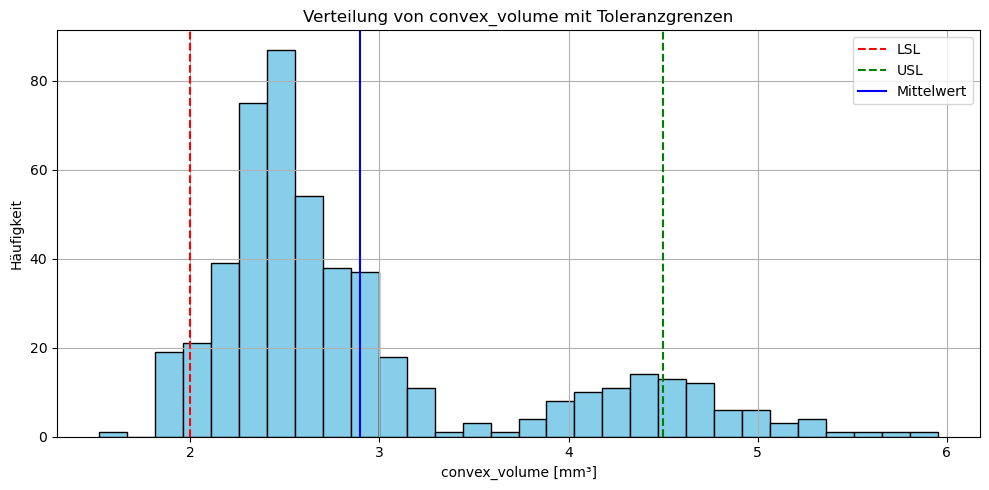

In [10]:

# Histogramm mit Toleranzgrenzen
plt.figure(figsize=(10, 5))
plt.hist(df['convex_volume'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(lsl, color='red', linestyle='--', label='LSL')
plt.axvline(usl, color='green', linestyle='--', label='USL')
plt.axvline(mean, color='blue', linestyle='-', label='Mittelwert')
plt.title("Verteilung von convex_volume mit Toleranzgrenzen")
plt.xlabel("convex_volume [mm³]")
plt.ylabel("Häufigkeit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##  Interpretation
- Der Cp-Wert liegt bei **0.48** und der Cpk-Wert bei **0.34**, was unterhalb der akzeptablen Prozessfähigkeitsgrenzen liegt.
- Das bedeutet: Obwohl das Modell gut erkennt, ist der physische Prozess **nicht stabil genug**.
- Die Schwankung im Volumen kann später zu Fehlentscheidungen oder Schlupf führen, wenn sich die Verteilung weiter verschiebt.
-  Empfehlung: Prozessparameter wie Lotmenge oder Druck in der Dosierstation überprüfen und optimieren.